<a href="https://colab.research.google.com/github/johnreyes96/modeling-and-simulation/blob/master/src/main/python/classes/MarkovChains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1° algorithm

In [ ]:
import numpy as np
import random as rm

states = ["Sleep", "Play", "Mix"] # The statespace
transitionName = [["SS", "SP", "SM"], ["PS", "PP", "PM"], ["MS", "MP", "MM"]] # Possible sequences of events
transitionMatrix = [[0.5, 0.3, 0.2], [0.7, 0.2, 0.1], [0.3, 0.6, 0.1]] # Probabilities matrix (transition matrix)

if sum(transitionMatrix[0]) + sum(transitionMatrix[1]) + sum(transitionMatrix[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

# A function that implements the Markov model to forecast the state/mood.
def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    print("Start state: " + activityToday)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [activityToday]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SM":
                prob = prob * 0.6
                activityToday = "Mix"
                activityList.append("Mix")
            else:
                prob = prob * 0.2
                activityToday = "Play"
                activityList.append("Play")
        elif activityToday == "Mix":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "MM":
                prob = prob * 0.5
                activityList.append("Mix")
                pass
            elif change == "MS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Play"
                activityList.append("Play")
        elif activityToday == "Play":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "PP":
                prob = prob * 0.1
                activityList.append("Play")
                pass
            elif change == "PS":
                prob = prob * 0.2
                activityToday = "Play"
                activityList.append("Play")
            else:
                prob = prob * 0.7
                activityToday = "Mix"
                activityList.append("Mix")
        i += 1  
    print("Possible states: " + str(activityList))
    print("End state after "+ str(days) + " days: " + activityToday)
    print("Probability of the possible sequence of states: " + str(prob))
    print("")

# Function that forecasts the possible state for the next 2 days
activity_forecast(2)
activity_forecast(6)

All is gonna be okay, you should move on!! ;)
Start state: Sleep
Possible states: ['Sleep', 'Mix', 'Play']
End state after 2 days: Play
Probability of the possible sequence of states: 0.18

Start state: Sleep
Possible states: ['Sleep', 'Play', 'Mix', 'Play', 'Mix', 'Play', 'Mix']
End state after 6 days: Mix
Probability of the possible sequence of states: 0.006173999999999998



# 2° algorithm

In [ ]:

# The statespace
states = ["Sleep","Icecream","Run"]

# Possible sequences of events
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]


if sum(transitionMatrix[0]) + sum(transitionMatrix[1]) + sum(transitionMatrix[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    activityList = [activityToday]
    i = 0
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1    
    return activityList

# To save every activityList
list_activity = []
count = 0

# `Range` starts from the first count up until but excluding the last count
for iterations in range(1,10000):
        list_activity.append(activity_forecast(2))

# Check out all the `activityList` we collected    
#print(list_activity)

# Iterate through the list to get a count of all activities ending in state:'Run'
for smaller_list in list_activity:
    if(smaller_list[2] == "Run"):
        count += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (count/10000) * 100
print("The probability of starting at state:'Sleep' and ending at state:'Run'= " + str(percentage) + "%")


All is gonna be okay, you should move on!! ;)
The probability of starting at state:'Sleep' and ending at state:'Run'= 62.18%


# 3° algorithm

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

#matplotlib parameters
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams.update({'font.size': 14})

mc_example = {'NYC': [.25,0,.75,1],
              'Paris': [.25,.25,0,0],
              'Cairo': [.25,.25,.25,0],
              'Seoul': [.25,.5,0,0]}

mc = pd.DataFrame(data = mc_example, index = ['NYC', 'Paris', 'Cairo', 'Seoul'])

travel_sim = []
travel_sim.append(mc.iloc[0].index[0])
city = np.random.choice(mc.iloc[0].index, p = mc.iloc[0])
travel_sim.append(city)

while len(travel_sim) < 25:
  city = np.random.choice(mc.iloc[mc.index.get_loc(city)].index, p = mc.iloc[mc.index.get_loc(city)])
  travel_sim.append(city)

In [ ]:
travel_sim

['NYC',
 'Cairo',
 'NYC',
 'Seoul',
 'NYC',
 'Cairo',
 'NYC',
 'Cairo',
 'NYC',
 'Seoul',
 'NYC',
 'Paris',
 'Cairo',
 'NYC',
 'Cairo',
 'Cairo',
 'NYC',
 'Seoul',
 'NYC',
 'Paris',
 'Seoul',
 'NYC',
 'Paris',
 'Seoul',
 'NYC']

In [ ]:
mc

,NYC,Paris,Cairo,Seoul
NYC,0.25,0.25,0.25,0.25
Paris,0.00,0.25,0.25,0.50
Cairo,0.75,0.00,0.25,0.00
Seoul,1.00,0.00,0.00,0.00


In [ ]:
mc.to_numpy()

array([[0.25, 0.25, 0.25, 0.25],
       [0.  , 0.25, 0.25, 0.5 ],
       [0.75, 0.  , 0.25, 0.  ],
       [1.  , 0.  , 0.  , 0.  ]])

In [ ]:
def matrix_power(matrix, power):
  if power == 0:
    return np.identity(len(matrix))
  elif power == 1:
    return matrix
  else:
    return np.dot(matrix, matrix_power(matrix, power-1))

matrix_power(mc.to_numpy(), 2)

array([[0.5   , 0.125 , 0.1875, 0.1875],
       [0.6875, 0.0625, 0.125 , 0.125 ],
       [0.375 , 0.1875, 0.25  , 0.1875],
       [0.25  , 0.25  , 0.25  , 0.25  ]])

In [ ]:
np.dot(np.dot(mc.to_numpy(), mc.to_numpy()), mc.to_numpy())

array([[0.453125, 0.15625 , 0.203125, 0.1875  ],
       [0.390625, 0.1875  , 0.21875 , 0.203125],
       [0.46875 , 0.140625, 0.203125, 0.1875  ],
       [0.5     , 0.125   , 0.1875  , 0.1875  ]])

In [ ]:
np.dot(mc.to_numpy(), mc.to_numpy())

array([[0.5   , 0.125 , 0.1875, 0.1875],
       [0.6875, 0.0625, 0.125 , 0.125 ],
       [0.375 , 0.1875, 0.25  , 0.1875],
       [0.25  , 0.25  , 0.25  , 0.25  ]])

In [ ]:
matrix_power(mc.to_numpy(), 3).sum(axis=1)

array([1., 1., 1., 1.])

In [ ]:
for i in range(1,10,1):
  print(f'n Step Transition Matrix at the nth power {i}\n', matrix_power(mc.to_numpy(), i),'\n')

n Step Transition Matrix at the nth power 1
 [[0.25 0.25 0.25 0.25]
 [0.   0.25 0.25 0.5 ]
 [0.75 0.   0.25 0.  ]
 [1.   0.   0.   0.  ]] 

n Step Transition Matrix at the nth power 2
 [[0.5    0.125  0.1875 0.1875]
 [0.6875 0.0625 0.125  0.125 ]
 [0.375  0.1875 0.25   0.1875]
 [0.25   0.25   0.25   0.25  ]] 

n Step Transition Matrix at the nth power 3
 [[0.453125 0.15625  0.203125 0.1875  ]
 [0.390625 0.1875   0.21875  0.203125]
 [0.46875  0.140625 0.203125 0.1875  ]
 [0.5      0.125    0.1875   0.1875  ]] 

n Step Transition Matrix at the nth power 4
 [[0.453125   0.15234375 0.203125   0.19140625]
 [0.46484375 0.14453125 0.19921875 0.19140625]
 [0.45703125 0.15234375 0.203125   0.1875    ]
 [0.453125   0.15625    0.203125   0.1875    ]] 

n Step Transition Matrix at the nth power 5
 [[0.45703125 0.15136719 0.20214844 0.18945312]
 [0.45703125 0.15234375 0.20214844 0.18847656]
 [0.45410156 0.15234375 0.203125   0.19042969]
 [0.453125   0.15234375 0.203125   0.19140625]] 

n Step Trans

# 4° algorithm - Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

In [2]:
state_space = ("sunny", "cloudy", "rainy")

In [3]:
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

In [4]:
n_steps = 20000
states = [0]
for i in range(n_steps):
    states.append(np.random.choice((0, 1, 2), p=transition_matrix[states[-1]])) # add , 3, 4, 5, 6, 7
states = np.array(states)

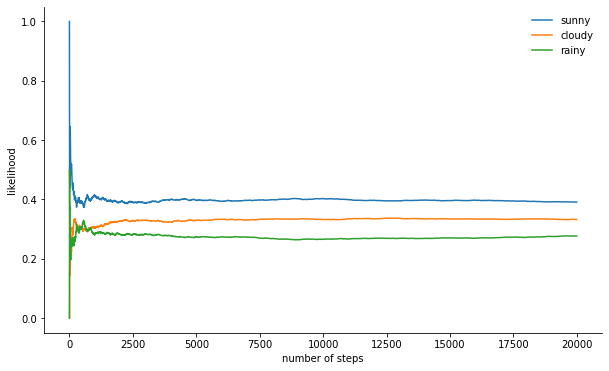

In [5]:
def despine(ax, spines=('top', 'left', 'right')):
    for spine in spines:
        ax.spines[spine].set_visible(False)

fig, ax = plt.subplots()
width = 1000
offsets = range(1, n_steps, 5)
for i, label in enumerate(state_space):
    ax.plot(offsets, [np.sum(states[:offset] == i) / offset
            for offset in offsets], label=label)
ax.set_xlabel("number of steps")
ax.set_ylabel("likelihood")
ax.legend(frameon=False)
despine(ax, ('top', 'right'))
plt.show()

In [6]:
def log_prob(x):
     return -0.5 * np.sum(x ** 2)

In [7]:
def proposal(x, stepsize):
    return np.random.uniform(low=x - 0.5 * stepsize,
                             high=x + 0.5 * stepsize,
                             size=x.shape)

In [8]:
def p_acc_MH(x_new, x_old, log_prob):
    return min(1, np.exp(log_prob(x_new) - log_prob(x_old)))

In [9]:
def sample_MH(x_old, log_prob, stepsize):
    x_new = proposal(x_old, stepsize)
    # here we determine whether we accept the new state or not:
    # we draw a random number uniformly from [0,1] and compare
    # it with the acceptance probability
    accept = np.random.random() < p_acc_MH(x_new, x_old, log_prob)
    if accept:
        return accept, x_new
    else:
        return accept, x_old

In [10]:
def build_MH_chain(init, stepsize, n_total, log_prob):

    n_accepted = 0
    chain = [init]

    for _ in range(n_total):
        accept, state = sample_MH(chain[-1], log_prob, stepsize)
        chain.append(state)
        n_accepted += accept

    acceptance_rate = n_accepted / float(n_total)

    return chain, acceptance_rate

In [11]:
chain, acceptance_rate = build_MH_chain(np.array([2.0]), 3.0, 10000, log_prob)
chain = [state for state, in chain]
print("Acceptance rate: {:.3f}".format(acceptance_rate))
last_states = ", ".join("{:.5f}".format(state)
                        for state in chain[-10:])
print("Last ten states of chain: " + last_states)

Acceptance rate: 0.720
Last ten states of chain: 1.05847, 1.59966, 0.14389, -1.13281, 0.24131, -0.77448, -0.59703, 0.67707, 1.47065, 1.27361


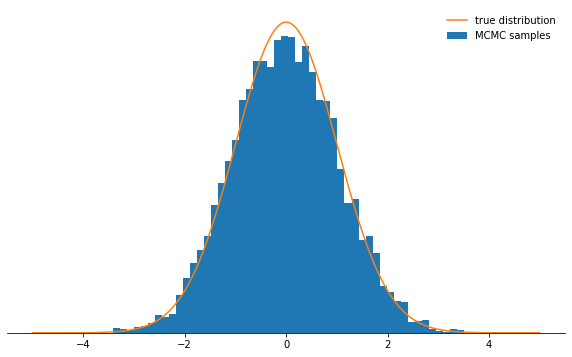

In [12]:
def plot_samples(chain, log_prob, ax, orientation='vertical', normalize=True,
                 xlims=(-5, 5), legend=True):
    from scipy.integrate import quad

    ax.hist(chain, bins=50, density=True, label="MCMC samples",
           orientation=orientation)
    # we numerically calculate the normalization constant of our PDF
    if normalize:
        Z, _ = quad(lambda x: np.exp(log_prob(x)), -np.inf, np.inf)
    else:
        Z = 1.0
    xses = np.linspace(xlims[0], xlims[1], 1000)
    yses = [np.exp(log_prob(x)) / Z for x in xses]
    if orientation == 'horizontal':
        (yses, xses) = (xses, yses)
    ax.plot(xses, yses, label="true distribution")
    if legend:
        ax.legend(frameon=False)

fig, ax = plt.subplots()
plot_samples(chain[500:], log_prob, ax)
despine(ax)
ax.set_yticks(())
plt.show()

Acceptance rate: 0.104


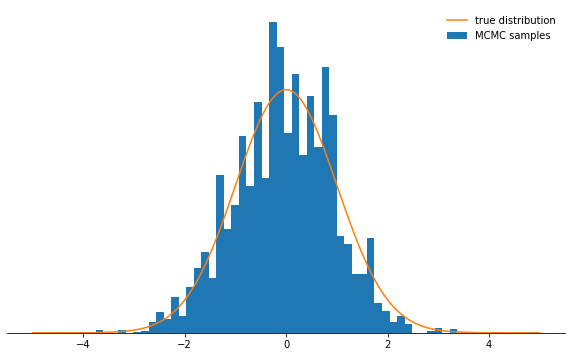

In [13]:
def sample_and_display(init_state, stepsize, n_total, n_burnin, log_prob):
    chain, acceptance_rate = build_MH_chain(init_state, stepsize, n_total, log_prob)
    print("Acceptance rate: {:.3f}".format(acceptance_rate))
    fig, ax = plt.subplots()
    plot_samples([state for state, in chain[n_burnin:]], log_prob, ax)
    despine(ax)
    ax.set_yticks(())
    plt.show()

sample_and_display(np.array([2.0]), 30, 10000, 500, log_prob)

Acceptance rate: 0.985


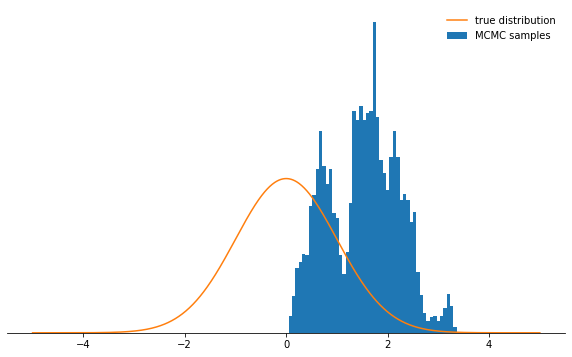

In [14]:
sample_and_display(np.array([2.0]), 0.1, 10000, 500, log_prob)

Acceptance rate: 0.990


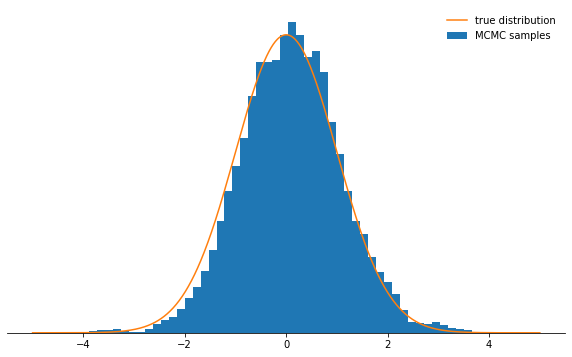

In [15]:
sample_and_display(np.array([2.0]), 0.1, 500000, 25000, log_prob)